In [31]:
!pip install bokeh
!pip install holoviews

In [32]:
import nltk
nltk.download('punkt')
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import holoviews as hv
import bokeh
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


path_data = 'drive/My Drive/Linguistics MS/INFO 5709/Project 3 Data/'
unigram = pd.read_csv(path_data + 'unigram_freq.csv')


unigram = unigram[~unigram.word.isin(stopwords)] # Remove stopwords (function words) from unigram frequency lists
unigram = unigram[~(unigram.word.str.len() < 4)].reset_index(drop=True)
unigram

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,count
0,home,1276852170
1,page,1082121730
2,search,1024093118
3,free,1014107316
4,information,932594387
...,...,...
319568,gooek,12711
319569,gooddg,12711
319570,gooblle,12711
319571,gollgo,12711


In [35]:
# Create five groups based on word frequency. We only go up to 10000 because the greatest statistical difference, based on 
# Zipf's Law, can be found in the top slice of the complete vocabulary list.

group1 = unigram.iloc[500:551]
group2 = unigram.iloc[5000:5051]
group3 = unigram.iloc[10000:10051]

group3

,word,count
10000,denise,4173228
10001,hypertension,4172902
10002,searchable,4172829
10003,touching,4172308
10004,aguilera,4172123
10005,vacancy,4171263
10006,servicing,4170827
10007,papa,4170314
10008,settlements,4169458
10009,strawberry,4169376


In [36]:
synopses = pd.read_csv(path_data + 'mpst_full_data.csv')
synopses = synopses.rename(columns={'plot_synopsis':'Synopsis','title':'Title'}).drop(columns=['split', 'synopsis_source', 'imdb_id'])
synopses

,Title,Synopsis,tags
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric"
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good"
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm..."
...,...,...,...
14823,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","comedy, murder"
14824,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","good versus evil, violence"
14825,Play Dirty,During the North African Campaign in World War...,anti war
14826,High Wall,Steven Kenet catches his unfaithful wife in th...,murder


In [37]:
sales = pd.read_csv(path_data + 'topmoviesales.csv')
sales

,Rank,Title,Studio,Worldwide,Domestic /%,Domestic /%2,Overseas /%,Overseas /%2,Year
0,1,Avengers: Endgame,BV,"$2,797.80",858.4,0.307,"$1,939.40",0.693,2019
1,4,Star Wars: The Force Awakens,BV,"$2,068.20",936.7,0.453,"$1,131.60",0.547,2015
2,5,Avengers: Infinity War,BV,"$2,048.40",678.8,0.331,"$1,369.50",0.669,2018
3,7,The Lion King (2019),BV,"$1,651.80",543,0.329,"$1,108.90",0.671,2019
4,8,Marvel's The Avengers,BV,"$1,518.80",623.4,0.410,$895.50,0.590,2012
...,...,...,...,...,...,...,...,...,...
785,764,London Has Fallen,Focus,$205.80,$62.50,0.304,$143.20,0.696,2016
786,765,Journey to the West,Magn.,$205.60,$18.1k,0.000,$205.60,1.000,2014
787,778,Hairspray (2007),NL,$202.50,$118.90,0.587,$83.70,0.413,2007
788,782,Teenage Mutant Ninja Turtles,NL,$202,$135.30,0.670,$66.70,0.330,1990


In [38]:
movies = pd.merge(synopses, sales, on='Title', how='inner')
movies

,Title,Synopsis,tags,Rank,Studio,Worldwide,Domestic /%,Domestic /%2,Overseas /%,Overseas /%2,Year
0,Flightplan,Kyle Pratt (Jodie Foster) is a propulsion engi...,"mystery, suspenseful, action, murder, flashback",685,BV,$223.40,$89.70,0.402,$133.70,0.598,2005
1,The Help,"In civil-rights era Jackson, Mississippi, 23-y...","historical, feel-good",711,BV,$216.60,$169.70,0.783,$46.90,0.217,2011
2,Bean,"Mr. Bean (Rowan Atkinson) is a well-meaning, b...","cult, comedy, entertaining",590,Gram.,$251.20,$45.30,0.180,$205.90,0.820,1997
3,The Amazing Spider-Man,Scientist Richard Parker (Campbell Scott) is p...,"murder, violence, flashback, good versus evil,...",100,Sony,$757.90,262,0.346,$495.90,0.654,2012
4,The Amazing Spider-Man,"In 2000, Oscorp scientist Richard Parker recor...",violence,100,Sony,$757.90,262,0.346,$495.90,0.654,2012
...,...,...,...,...,...,...,...,...,...,...,...
714,Godzilla: King of the Monsters,"American reporter, Steve Martin (Raymond Burr)...",violence,310,WB,$385.90,$110.50,0.286,$275.40,0.714,2019
715,The Expendables 2,"The Expendables—leader Barney Ross, knife spec...","boring, murder, bleak, violence, cult, good ve...",443,LGF,$315,85,0.270,$229.90,0.730,2012
716,Indecent Proposal,High school sweethearts David (Woody Harrelson...,cult,552,Par.,$266.60,$106.60,0.400,$160,0.600,1993
717,The Full Monty,"The once-successful steel mills of Sheffield, ...","cute, comedy, entertaining, sentimental",572,FoxS,$257.90,$46.00,0.178,$212,0.822,1997


In [39]:
for index, row in movies.iterrows():
  movies.loc[index, 'Group'] = ''
  movies.loc[index, 'Keywords'] = ''
  
  for word in group1['word']:
    if re.search(r"\b" + re.escape(str(word)) + r"\b", str(row[1])):
      movies.loc[index, 'Group'] = 1
      movies.loc[index, 'Keywords'] =  movies.loc[index, 'Keywords']+" "+word
  for word in group2['word']:
    if re.search(r"\b" + re.escape(str(word)) + r"\b", str(row[1])):
      movies.loc[index, 'Group'] = 2
      movies.loc[index, 'Keywords'] =  movies.loc[index, 'Keywords']+" "+word
  for word in group3['word']:
    if re.search(r"\b" + re.escape(str(word)) + r"\b", str(row[1])):
      movies.loc[index, 'Group'] = 3
      movies.loc[index, 'Keywords'] =  movies.loc[index, 'Keywords']+" "+word
for index, row in movies.iterrows():
  if row[11] == '':
    movies.loc[index, 'Group'] = 3

print(len(movies.loc[movies['Group'] ==3.0]), len(movies.loc[movies['Group'] ==2.0]), len(movies.loc[movies['Group'] ==1.0]))
movies

234 244 241


,Title,Synopsis,tags,Rank,Studio,Worldwide,Domestic /%,Domestic /%2,Overseas /%,Overseas /%2,Year,Group,Keywords
0,Flightplan,Kyle Pratt (Jodie Foster) is a propulsion engi...,"mystery, suspenseful, action, murder, flashback",685,BV,$223.40,$89.70,0.402,$133.70,0.598,2005,3,drive director electronics upon elevator
1,The Help,"In civil-rights era Jackson, Mississippi, 23-y...","historical, feel-good",711,BV,$216.60,$169.70,0.783,$46.90,0.217,2011,1,least friends tell able drive several living ...
2,Bean,"Mr. Bean (Rowan Atkinson) is a well-meaning, b...","cult, comedy, entertaining",590,Gram.,$251.20,$45.30,0.180,$205.90,0.820,1997,1,months tell already upon
3,The Amazing Spider-Man,Scientist Richard Parker (Campbell Scott) is p...,"murder, violence, flashback, good versus evil,...",100,Sony,$757.90,262,0.346,$495.90,0.654,2012,2,friends cars short wrestling gathering
4,The Amazing Spider-Man,"In 2000, Oscorp scientist Richard Parker recor...",violence,100,Sony,$757.90,262,0.346,$495.90,0.654,2012,1,months living
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,Godzilla: King of the Monsters,"American reporter, Steve Martin (Raymond Burr)...",violence,310,WB,$385.90,$110.50,0.286,$275.40,0.714,2019,1,safety
715,The Expendables 2,"The Expendables—leader Barney Ross, knife spec...","boring, murder, bleak, violence, cult, good ve...",443,LGF,$315,85,0.270,$229.90,0.730,2012,1,able several five
716,Indecent Proposal,High school sweethearts David (Woody Harrelson...,cult,552,Par.,$266.60,$106.60,0.400,$160,0.600,1993,3,
717,The Full Monty,"The once-successful steel mills of Sheffield, ...","cute, comedy, entertaining, sentimental",572,FoxS,$257.90,$46.00,0.178,$212,0.822,1997,2,others five suicide


In [0]:
movies.to_csv(path_data + 'movie_synopses.csv')

{'drive': 152, 'director': 41, 'electronics': 10, 'upon': 193, 'elevator': 62, 'least': 50, 'friends': 225, 'tell': 256, 'able': 248, 'several': 281, 'living': 183, 'short': 138, 'whether': 70, 'months': 113, 'already': 147, 'cars': 64, 'wrestling': 9, 'gathering': 34, 'means': 99, 'chase': 184, 'retired': 32, 'provides': 51, 'green': 54, 'gold': 53, 'suicide': 68, 'others': 229, 'association': 4, 'beach': 64, 'five': 106, 'remarks': 50, 'detected': 20, 'warn': 69, 'safety': 124, 'trade': 45, 'called': 267, 'planning': 71, 'touching': 17, 'releasing': 29, 'sure': 97, 'display': 40, 'past': 169, 'decades': 12, 'cops': 40, 'shells': 10, 'collection': 23, 'natural': 37, 'close': 167, 'daily': 14, 'agreement': 18, 'common': 18, 'painter': 3, 'specific': 21, 'arts': 17, 'judges': 11, 'limited': 15, 'distributor': 3, 'edition': 3, 'updated': 9, 'period': 22, 'hood': 16, 'extract': 24, 'downloaded': 3, 'pupil': 2, 'walked': 7, 'waves': 30, 'society': 33, 'redemption': 2, 'laying': 11, 'photog

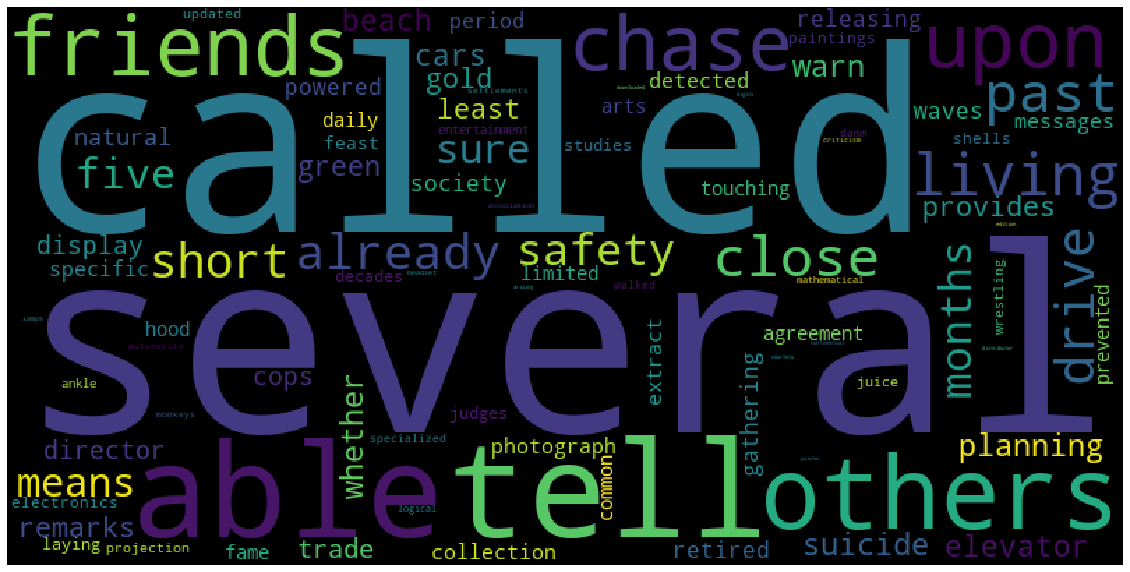

In [41]:

cloud_words = movies.iloc[:,12]
cloud_words = cloud_words.str.cat(sep=' ')
cloud_words = cloud_words.replace('  ', ' ')

split_words = WordCloud(collocations=False).process_text(cloud_words)
print(split_words)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(split_words)
plt.figure( figsize=(20,15) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
# Doing an exploratory data analysis of the data

eda = movies.drop(columns=['Year', 'Group'])
eda.describe()

,Rank,Domestic /%2,Overseas /%2
count,719.000000,719.000000,719.000000
mean,400.527121,0.421975,0.578025
std,221.108587,0.124470,0.124470
min,2.000000,0.000000,0.172000
25%,211.500000,0.334000,0.499000
50%,404.000000,0.413000,0.587000
75%,587.000000,0.501000,0.666000
max,790.000000,0.828000,1.000000


In [43]:
#Cleaning our Domestic, Worldwide, and Overseas data so we can analyze them numerically

movies = pd.read_csv(path_data+'movie_synopses.csv')
movies = movies.rename(columns={'Domestic /%':'Domestic', 'Overseas /%':'Overseas', 'Domestic /%2':'Domestic Percentage', 'Overseas /%2':'Overseas Percentage'}).drop(columns='Unnamed: 0')

movies.Worldwide = movies.Worldwide.apply(lambda x: str(x)).apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).apply(lambda x: float(x))
movies.Domestic = movies.Domestic.apply(lambda x: str(x)).apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('k','')).apply(lambda x: float(x))
movies.Overseas = movies.Overseas.apply(lambda x: str(x)).apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).apply(lambda x: float(x))

movies

,Title,Synopsis,tags,Rank,Studio,Worldwide,Domestic,Domestic Percentage,Overseas,Overseas Percentage,Year,Group,Keywords
0,Flightplan,Kyle Pratt (Jodie Foster) is a propulsion engi...,"mystery, suspenseful, action, murder, flashback",685,BV,223.4,89.7,0.402,133.7,0.598,2005,3,drive director electronics upon elevator
1,The Help,"In civil-rights era Jackson, Mississippi, 23-y...","historical, feel-good",711,BV,216.6,169.7,0.783,46.9,0.217,2011,1,least friends tell able drive several living ...
2,Bean,"Mr. Bean (Rowan Atkinson) is a well-meaning, b...","cult, comedy, entertaining",590,Gram.,251.2,45.3,0.180,205.9,0.820,1997,1,months tell already upon
3,The Amazing Spider-Man,Scientist Richard Parker (Campbell Scott) is p...,"murder, violence, flashback, good versus evil,...",100,Sony,757.9,262.0,0.346,495.9,0.654,2012,2,friends cars short wrestling gathering
4,The Amazing Spider-Man,"In 2000, Oscorp scientist Richard Parker recor...",violence,100,Sony,757.9,262.0,0.346,495.9,0.654,2012,1,months living
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,Godzilla: King of the Monsters,"American reporter, Steve Martin (Raymond Burr)...",violence,310,WB,385.9,110.5,0.286,275.4,0.714,2019,1,safety
715,The Expendables 2,"The Expendables—leader Barney Ross, knife spec...","boring, murder, bleak, violence, cult, good ve...",443,LGF,315.0,85.0,0.270,229.9,0.730,2012,1,able several five
716,Indecent Proposal,High school sweethearts David (Woody Harrelson...,cult,552,Par.,266.6,106.6,0.400,160.0,0.600,1993,3,NaN
717,The Full Monty,"The once-successful steel mills of Sheffield, ...","cute, comedy, entertaining, sentimental",572,FoxS,257.9,46.0,0.178,212.0,0.822,1997,2,others five suicide


In [0]:
# Finally, let's add a couple more descriptive columns about the synopses before testing our hypotheses.
# These columns will come into play a little bit in this project, but I really want to use them as 
# the beginnings of an exploration to expand this project next semester.

movies['Word Count'] = [len(word.split()) for word in movies['Synopsis']]

movies['Character Count'] = movies.Synopsis.apply(lambda x: len(x))
movies['Word Length'] = np.round(movies['Character Count']/movies['Word Count'], 3)
movies.to_csv(path_data+'movie_data.csv')   # Reading to CSV at this point for creation of an interactive dashboard in Power BI; see visualization 1/Figure 6 in my report.

In [45]:
movies.describe()

,Rank,Worldwide,Domestic,Domestic Percentage,Overseas,Overseas Percentage,Year,Group,Word Count,Character Count,Word Length
count,719.000000,719.000000,718.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.00000,719.000000,719.000000
mean,400.527121,426.397218,172.131198,0.421975,254.530320,0.578025,2001.115438,1.990264,1676.98331,9630.677330,5.810659
std,221.108587,272.184065,96.619054,0.124470,192.881069,0.124470,75.388016,0.813305,1529.15713,8603.736213,0.222814
min,2.000000,200.300000,18.100000,0.000000,40.400000,0.172000,0.000000,1.000000,210.00000,1232.000000,5.147000
25%,211.500000,252.700000,110.100000,0.334000,140.700000,0.499000,1998.000000,1.000000,720.00000,4295.000000,5.650000
50%,404.000000,336.400000,145.050000,0.413000,200.500000,0.587000,2006.000000,2.000000,1087.00000,6298.000000,5.803000
75%,587.000000,497.400000,209.375000,0.501000,300.350000,0.666000,2012.000000,3.000000,2012.50000,11521.500000,5.962000
max,790.000000,2789.700000,760.500000,0.828000,2029.200000,1.000000,2019.000000,3.000000,10418.00000,59637.000000,6.507000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


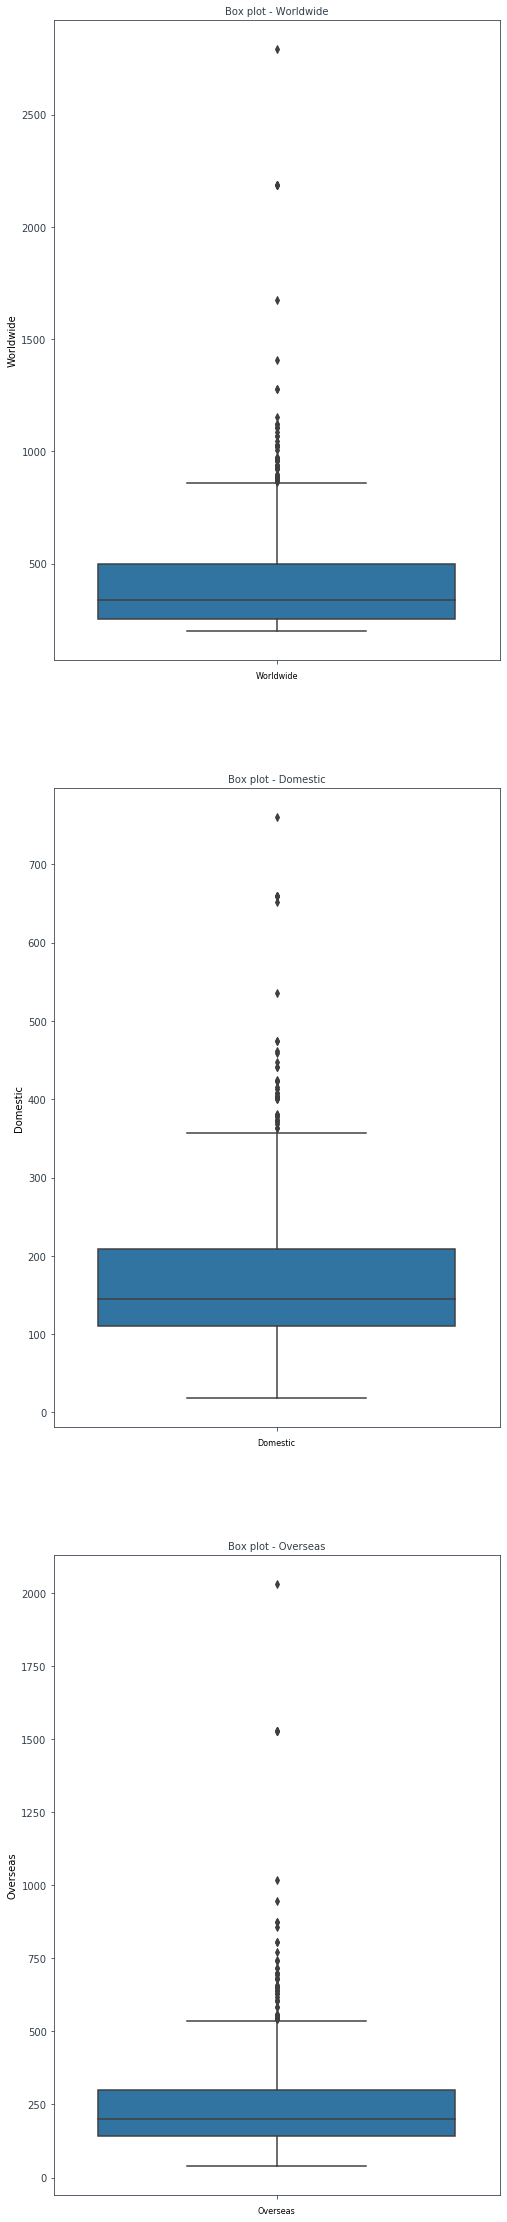

In [46]:
import seaborn as sns

col_names = ['Worldwide','Domestic', 'Overseas']
fig, ax = plt.subplots(len(col_names), figsize=(8,40))
for i, col_val in enumerate(col_names):    
  sns.boxplot(y=movies[col_val], ax=ax[i])    
  ax[i].set_title('Box plot - '+col_val, fontsize=10)    
  ax[i].set_xlabel(col_val, fontsize=8)
  
plt.show()

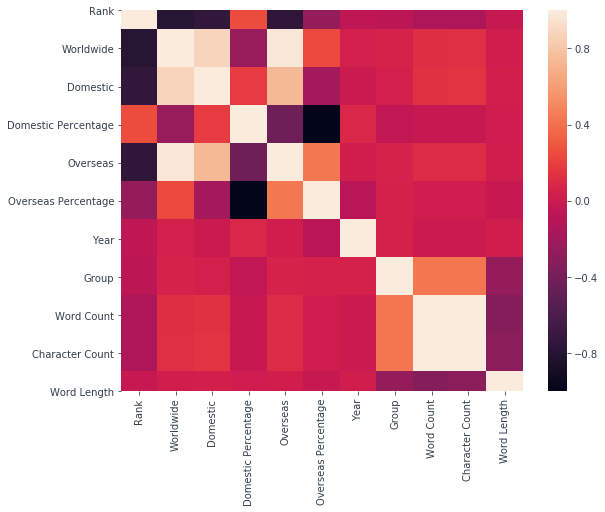

In [47]:
f, ax = plt.subplots(figsize=(9, 7))
corr = movies.corr()
sns.heatmap(corr,             
            xticklabels=corr.columns.values,            
            yticklabels=corr.columns.values)

{'mystery': 87, 'suspenseful': 114, 'action': 189, 'murder': 275, 'flashback': 237, 'historical': 52, 'feel': 18, 'good': 175, 'cult': 182, 'comedy': 205, 'entertaining': 166, 'violence': 293, 'versus': 157, 'evil': 157, 'humor': 150, 'romantic': 169, 'revenge': 189, 'brainwashing': 12, 'fantasy': 108, 'gothic': 28, 'boring': 108, 'psychedelic': 142, 'comic': 10, 'sci': 42, 'fi': 42, 'satire': 44, 'sadist': 26, 'psychological': 22, 'stupid': 42, 'whimsical': 13, 'dramatic': 65, 'cute': 50, 'clever': 17, 'fiction': 17, 'melodrama': 26, 'inspiring': 20, 'sentimental': 41, 'pornographic': 4, 'intrigue': 10, 'alternate': 34, 'reality': 20, 'storytelling': 28, 'adult': 12, 'absurd': 15, 'paranormal': 42, 'bleak': 26, 'horror': 32, 'prank': 12, 'anti': 6, 'war': 6, 'atmospheric': 40, 'tragedy': 40, 'dark': 29, 'neo': 35, 'noir': 35, 'realism': 29, 'thought': 19, 'provoking': 19, 'philosophical': 18, 'home': 7, 'movie': 7, 'history': 14, 'western': 4, 'blaxploitation': 2, 'grindhouse': 1, 'fi

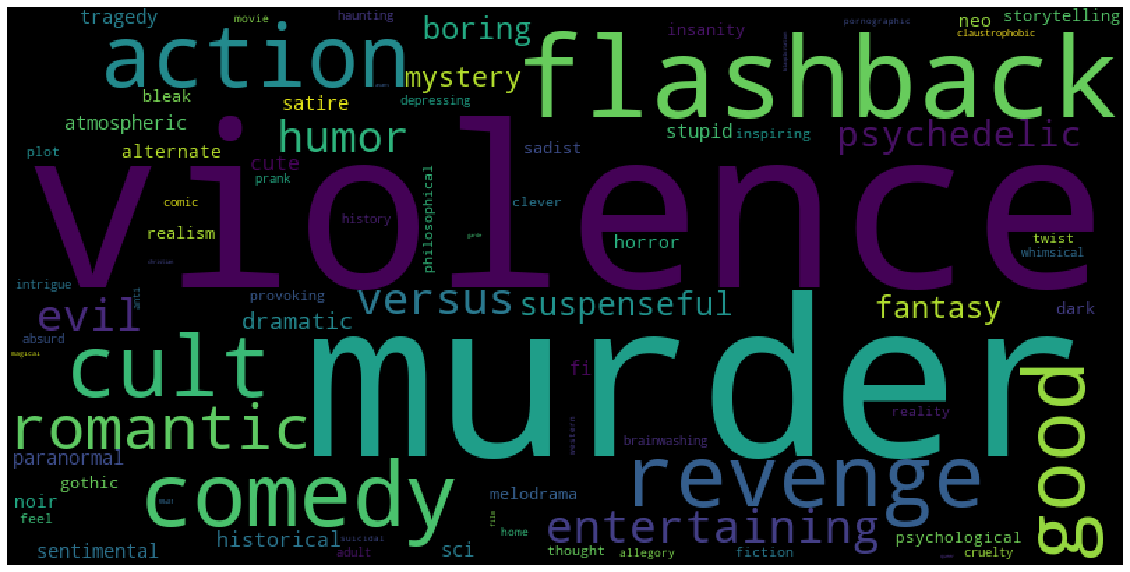

In [48]:
movies.tags = movies.tags.apply(lambda x: x.replace(',',''))

cloud_tags = movies.iloc[:,2]
cloud_tags = cloud_tags.str.cat(sep=' ')
cloud_tags = cloud_tags.replace('  ', ' ')

split_tags = WordCloud(collocations=False).process_text(cloud_tags)
print(split_tags)
tagcloud = WordCloud(width=800, height=400).generate_from_frequencies(split_tags)
plt.figure( figsize=(20,15) )
plt.imshow(tagcloud)
plt.axis("off")
plt.show()

In [49]:
# IN this cell, we'll look at three tag frequency groups. We might not use every one of these tags, but we want to look at numerical data to back up
# the intuitions we gathered from the tag cloud above. 

from nltk import FreqDist
from nltk import word_tokenize

cloud_tokens = nltk.word_tokenize(cloud_tags)
freq_tags = FreqDist(cloud_tokens)
print(freq_tags.most_common(10)) # Ten most common tags
most_frequent_tags = [a for (a,b) in freq_tags.most_common(10)]
second_frequent_tags = [a for (a,b) in freq_tags.most_common(20)[10:20]]
third_frequent_tags = [a for (a,b) in freq_tags.most_common(31)[21:31]]
most_frequent_tags, second_frequent_tags, third_frequent_tags

[('violence', 293), ('murder', 275), ('flashback', 237), ('comedy', 205), ('action', 189), ('revenge', 189), ('cult', 182), ('romantic', 169), ('entertaining', 166), ('good', 157)]


(['violence',
  'murder',
  'flashback',
  'comedy',
  'action',
  'revenge',
  'cult',
  'romantic',
  'entertaining',
  'good'],
 ['versus',
  'evil',
  'humor',
  'psychedelic',
  'suspenseful',
  'fantasy',
  'boring',
  'mystery',
  'dramatic',
  'historical'],
 ['satire',
  'sci-fi',
  'stupid',
  'paranormal',
  'sentimental',
  'atmospheric',
  'tragedy',
  'neo',
  'noir',
  'alternate'])

In [50]:
movies

,Title,Synopsis,tags,Rank,Studio,Worldwide,Domestic,Domestic Percentage,Overseas,Overseas Percentage,Year,Group,Keywords,Word Count,Character Count,Word Length
0,Flightplan,Kyle Pratt (Jodie Foster) is a propulsion engi...,mystery suspenseful action murder flashback,685,BV,223.4,89.7,0.402,133.7,0.598,2005,3,drive director electronics upon elevator,1116,6726,6.027
1,The Help,"In civil-rights era Jackson, Mississippi, 23-y...",historical feel-good,711,BV,216.6,169.7,0.783,46.9,0.217,2011,1,least friends tell able drive several living ...,1881,11180,5.944
2,Bean,"Mr. Bean (Rowan Atkinson) is a well-meaning, b...",cult comedy entertaining,590,Gram.,251.2,45.3,0.180,205.9,0.820,1997,1,months tell already upon,1155,6674,5.778
3,The Amazing Spider-Man,Scientist Richard Parker (Campbell Scott) is p...,murder violence flashback good versus evil hum...,100,Sony,757.9,262.0,0.346,495.9,0.654,2012,2,friends cars short wrestling gathering,1136,6870,6.048
4,The Amazing Spider-Man,"In 2000, Oscorp scientist Richard Parker recor...",violence,100,Sony,757.9,262.0,0.346,495.9,0.654,2012,1,months living,683,4275,6.259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,Godzilla: King of the Monsters,"American reporter, Steve Martin (Raymond Burr)...",violence,310,WB,385.9,110.5,0.286,275.4,0.714,2019,1,safety,441,2682,6.082
715,The Expendables 2,"The Expendables—leader Barney Ross, knife spec...",boring murder bleak violence cult good versus ...,443,LGF,315.0,85.0,0.270,229.9,0.730,2012,1,able several five,561,3406,6.071
716,Indecent Proposal,High school sweethearts David (Woody Harrelson...,cult,552,Par.,266.6,106.6,0.400,160.0,0.600,1993,3,NaN,348,2031,5.836
717,The Full Monty,"The once-successful steel mills of Sheffield, ...",cute comedy entertaining sentimental,572,FoxS,257.9,46.0,0.178,212.0,0.822,1997,2,others five suicide,705,3844,5.452


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


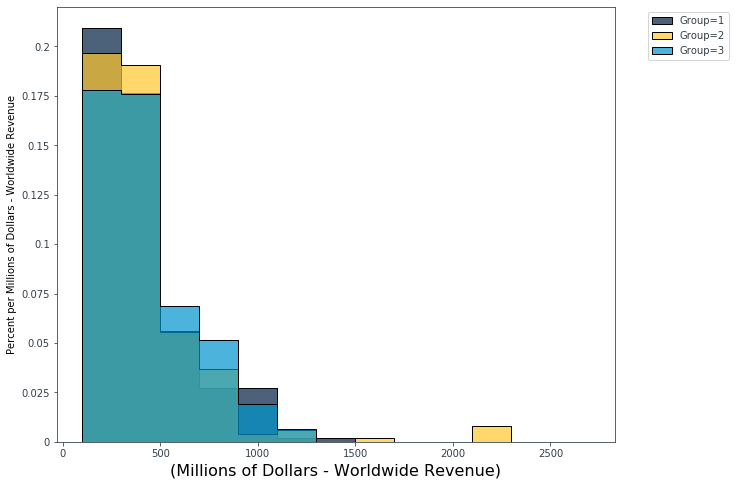

In [51]:
# The DataScience package from Berkeley is mounted on pandas and matplotlib, and makes commands for graphing very easy. (It is not very powerful, 
# so use only when you wish to perform simple graphing operations!)

from datascience import *

movies_table = Table.from_df(movies)
movies_sub = movies_table.select('Worldwide', 'Group')
movies_sub.hist('Worldwide', bins=np.arange(100, 2800, 200), unit='Millions of Dollars - Worldwide Revenue', group='Group', width=10, height=8)

In [0]:
from ipywidgets import widgets, interactive

In [53]:
# This function will allow us to interact with the data across the genre tag metric

movies_interactive = movies[['Worldwide', 'Domestic', 'Overseas', 'tags', 'Group']]

# Gathering a unique list of tags we can use to select.

tags = []
movies_interactive['tags'].apply(lambda x: x.split()).apply(lambda x: tags.append(x))
taglist = []
for i in tags:
    taglist += i

# Creating the dropdown

taglist = set(taglist)
tag_dropdown = widgets.Dropdown(
    options= taglist,
    description='Tags:',
)

# Defining our function

def plotit(genres):

    movies2 = movies_interactive.copy()
    movies2 = movies2[movies_interactive.tags.str.contains(genres)]

    # Plot it (only if there's data to plot)
    if len(movies2) > 0:
        movies2.groupby('Group').mean()[['Domestic', 'Overseas']].plot(kind='bar', title="Tags include {}".format(genres))
        plt.show();
        
    else:
        print("No data to show for current selection")

interactive(plotit, genres=taglist)

interactive(children=(Dropdown(description='genres', options=('movie', 'sadist', 'realism', 'twist', 'comedy',…